In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
df=pd.read_csv("mpii_dataset.csv")

In [4]:
df=df[:3000]
print(df.shape)

(3000, 37)


In [5]:
img=Image.open('../MPII/000003072.jpg')
imsize=np.array(img.size)
fact=imsize/224.0
print(fact)

[5.71428571 3.21428571]


In [6]:
def pix1(ix):
    img = df['NAME'][ix]
    print(img)
    

    im = Image.open('../MPII/'+img )
    #implot=plt.imshow(im)
    #plt.show()
    im2=im.resize((224,224))
    implot = plt.imshow(im2)
    imsize=np.array(im.size)
    fact=imsize/224.0
    print(fact)
    
    px=2
    kx=ix
    while px <34:
        col = df.columns[px]
        x = df[col][ix]
        col = df.columns[px+1]
        y = df[col][ix]
        print(col,x,y)
        #plt.scatter([[x]],[[y]])
        px=px+2
    cx=2
    while cx<34:
        col=df.columns[cx]
        x=df[col][kx]/fact[0]
        col=df.columns[cx+1]
        y=df[col][kx]/fact[1]
        print(col,x,y)
        plt.scatter([[x]],[[y]])
        cx+=2
    plt.show()
    

018182497.jpg
[2.85714286 2.14285714]
('r ankle_Y', 325, 349)
('r knee_Y', 341, 327)
('r hip_Y', 326, 302)
('l hip_Y', 385, 277)
('l knee_Y', 409, 302)
('l ankle_Y', 399, 377)
('pelvis_Y', 356, 290)
('thorax_Y', 314, 209)
('upper neck_Y', 315.2436, 213.9744)
('head top_Y', 286.7564, 100.0256)
('r wrist_Y', 318, 325)
('r elbow_Y', 280, 288)
('r shoulder_Y', 267, 231)
('l shoulder_Y', 360, 187)
('l elbow_Y', 406, 218)
('l wrist_Y', 374, 258)
('r ankle_Y', 113.75, 162.86666666666667)
('r knee_Y', 119.35, 152.6)
('r hip_Y', 114.1, 140.93333333333334)
('l hip_Y', 134.75, 129.26666666666668)
('l knee_Y', 143.15, 140.93333333333334)
('l ankle_Y', 139.65, 175.93333333333334)
('pelvis_Y', 124.6, 135.33333333333334)
('thorax_Y', 109.89999999999999, 97.53333333333333)
('upper neck_Y', 110.33526, 99.85472)
('head top_Y', 100.36474, 46.67861333333333)
('r wrist_Y', 111.3, 151.66666666666666)
('r elbow_Y', 98.0, 134.4)
('r shoulder_Y', 93.45, 107.8)
('l shoulder_Y', 126.0, 87.26666666666667)
('l elb

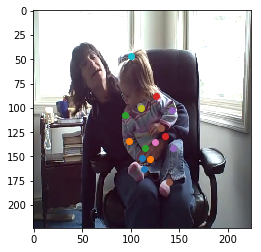

In [7]:
pix1(8)

In [8]:
import os
import cv2
import h5py
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [9]:
from PIL import Image
from pathlib import Path
from keras.models import Sequential,Model
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16,preprocess_input

In [10]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [11]:
from keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Input,Flatten,SeparableConv2D,GlobalAveragePooling2D

In [12]:
from keras.layers import GlobalMaxPool2D
from keras import backend as K
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping,TensorBoard,ReduceLROnPlateau,CSVLogger,LearningRateScheduler

In [13]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
color=sns.color_palette()
%matplotlib inline

In [14]:
def step_decay(epoch):
    initial_rate=0.1
    drop=0.5
    epochs_drop=5.0
    lrate=intia_rate*math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

In [15]:
def show_final_history(history):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch,history.history['loss'],label="Train Losss")
    ax[0].plot(history.epoch,history.history["val_loss"],label="Validation_loss")
    ax[1].set_title('mse')
    ax[1].plot(history.epoch,history.history["mean_absolute_error"],label="Train_acc")
    ax[1].plot(history.epoch,history.history["val_mean_absolute_error"],label="validaton_loss")
    ax[0].legend()
    ax[1].legend()

In [16]:
train_data='../MPII/'

In [17]:
data=pd.read_csv('mpii_dataset.csv')
data=data[:3000]
print(type(data['NAME'].values))

image_data=[]
labels=[]

print(data.shape[0])
print(data['NAME'].shape)
data.head()

<type 'numpy.ndarray'>
3000
(3000,)


,Unnamed: 0,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,0,015601864.jpg,620,394,616,269,573,185,647,188,...,167,692,185,693,240,688,313,3.021046,curling,sports
1,0,015599452.jpg,-1,-1,-1,-1,806,543,720,593,...,281,719,299,711,516,545,466,5.641276,curling,sports
2,0,005808361.jpg,804,711,816,510,908,438,1040,454,...,253,1067,253,1167,353,1142,478,4.718488,curling,sports
3,0,086617615.jpg,301,461,305,375,201,340,294,342,...,261,314,264,327,320,362,346,2.681349,curling,sports
4,0,060111501.jpg,980,322,896,318,865,248,943,226,...,147,923,123,995,163,961,223,3.806403,curling,sports


In [18]:
for img_path in data['NAME'].values:
    img=load_img('../MPII/'+img_path,target_size=(224,224))
    img_array=img_to_array(img)
    image_data.append(img_array)


In [19]:
print(len(image_data))
image_data2=np.asarray(image_data)
print(image_data2.shape)

3000
(3000, 224, 224, 3)


In [20]:
y_train=data[data.columns[2:-3]]
print(y_train.columns)
print(y_train.shape)

y_train2=np.ones((y_train.shape))
print(y_train.shape)
for ix in range(data.shape[0]):
    img=df['NAME'][ix]
    print(img)
    print(ix)
    im = Image.open('../MPII/'+img )
    #implot=plt.imshow(im)
    #plt.show()
    im2=im.resize((224,224))
    #implot = plt.imshow(im2)
    imsize=np.array(im.size)
    fact=imsize/224.0
    print(fact)
    cx=2
    while cx<34:
        col=df.columns[cx]
        x=df[col][ix]/fact[0]
        col=df.columns[cx+1]
        y=df[col][ix]/fact[1]
        #print(col,x,y)
        y_train2[ix][cx-2]=x
        y_train2[ix][cx-1]=y
        cx+=2
    

Index([u'r ankle_X', u'r ankle_Y', u'r knee_X', u'r knee_Y', u'r hip_X',
       u'r hip_Y', u'l hip_X', u'l hip_Y', u'l knee_X', u'l knee_Y',
       u'l ankle_X', u'l ankle_Y', u'pelvis_X', u'pelvis_Y', u'thorax_X',
       u'thorax_Y', u'upper neck_X', u'upper neck_Y', u'head top_X',
       u'head top_Y', u'r wrist_X', u'r wrist_Y', u'r elbow_X', u'r elbow_Y',
       u'r shoulder_X', u'r shoulder_Y', u'l shoulder_X', u'l shoulder_Y',
       u'l elbow_X', u'l elbow_Y', u'l wrist_X', u'l wrist_Y'],
      dtype='object')
(3000, 32)
(3000, 32)
015601864.jpg
0
[5.71428571 3.21428571]
015599452.jpg
1
[5.71428571 3.21428571]
005808361.jpg
2
[5.71428571 3.21428571]
086617615.jpg
3
[5.71428571 3.21428571]
060111501.jpg
4
[5.71428571 3.21428571]
070807258.jpg
5
[5.71428571 3.21428571]
002058449.jpg
6
[5.71428571 3.21428571]
021233911.jpg
7
[2.85714286 2.14285714]
018182497.jpg
8
[2.85714286 2.14285714]
018340451.jpg
9
[3.8125     2.14285714]
030424224.jpg
10
[3.8125     2.14285714]
052475643.jpg

[5.71428571 3.21428571]
057006117.jpg
186
[5.71428571 3.21428571]
061500723.jpg
187
[2.85714286 2.14285714]
099005385.jpg
188
[2.85714286 2.14285714]
014008402.jpg
189
[2.85714286 2.14285714]
051832965.jpg
190
[2.85714286 2.14285714]
087737307.jpg
191
[2.85714286 2.14285714]
074076862.jpg
192
[3.8125     2.14285714]
069701574.jpg
193
[3.8125     2.14285714]
070248408.jpg
194
[8.57142857 4.82142857]
035949115.jpg
195
[8.57142857 4.82142857]
029359184.jpg
196
[8.57142857 4.82142857]
080936116.jpg
197
[5.71428571 3.21428571]
081011339.jpg
198
[5.71428571 3.21428571]
086707232.jpg
199
[5.71428571 3.21428571]
091324055.jpg
200
[5.71428571 3.21428571]
051134240.jpg
201
[5.71428571 3.21428571]
050151629.jpg
202
[8.57142857 4.82142857]
079829518.jpg
203
[8.57142857 4.82142857]
070196688.jpg
204
[3.8125     2.14285714]
079579267.jpg
205
[3.8125     2.14285714]
057828014.jpg
206
[5.71428571 3.21428571]
046559802.jpg
207
[5.71428571 3.21428571]
054264463.jpg
208
[5.71428571 3.21428571]
028654125.

[3.78571429 2.14285714]
052016350.jpg
386
[3.78571429 2.14285714]
085218150.jpg
387
[3.78571429 2.14285714]
055190684.jpg
388
[3.78571429 2.14285714]
056093797.jpg
389
[3.8125     2.14285714]
087665360.jpg
390
[3.8125     2.14285714]
075513726.jpg
391
[5.71428571 3.21428571]
062030955.jpg
392
[5.71428571 3.21428571]
021296416.jpg
393
[5.71428571 3.21428571]
013637148.jpg
394
[5.71428571 3.21428571]
001454467.jpg
395
[2.85714286 2.14285714]
058991769.jpg
396
[8.57142857 4.82142857]
039224405.jpg
397
[8.57142857 4.82142857]
043747492.jpg
398
[8.57142857 4.82142857]
051398949.jpg
399
[5.71428571 3.21428571]
078365301.jpg
400
[5.71428571 3.21428571]
062208670.jpg
401
[5.71428571 3.21428571]
086236371.jpg
402
[5.71428571 3.21428571]
094952062.jpg
403
[3.78571429 2.14285714]
014707348.jpg
404
[3.78571429 2.14285714]
025824439.jpg
405
[2.85714286 2.14285714]
045913576.jpg
406
[2.85714286 2.14285714]
007586333.jpg
407
[8.57142857 4.82142857]
012804584.jpg
408
[8.57142857 4.82142857]
015190269.

[8.57142857 4.82142857]
067189274.jpg
583
[8.57142857 4.82142857]
001971054.jpg
584
[8.57142857 4.82142857]
010410858.jpg
585
[8.57142857 4.82142857]
079991609.jpg
586
[8.57142857 4.82142857]
017854466.jpg
587
[8.57142857 4.82142857]
065274611.jpg
588
[8.57142857 4.82142857]
023818278.jpg
589
[8.57142857 4.82142857]
009944139.jpg
590
[8.57142857 4.82142857]
024317219.jpg
591
[8.57142857 4.82142857]
072226693.jpg
592
[8.57142857 4.82142857]
085569647.jpg
593
[8.57142857 4.82142857]
083021986.jpg
594
[8.57142857 4.82142857]
039718353.jpg
595
[8.57142857 4.82142857]
066808514.jpg
596
[8.57142857 4.82142857]
020498430.jpg
597
[8.57142857 4.82142857]
029314773.jpg
598
[8.57142857 4.82142857]
089633582.jpg
599
[8.57142857 4.82142857]
001300192.jpg
600
[5.71428571 3.21428571]
008550853.jpg
601
[5.71428571 3.21428571]
081744356.jpg
602
[3.8125     2.14285714]
025942343.jpg
603
[3.8125     2.14285714]
037969241.jpg
604
[3.8125     2.14285714]
059029494.jpg
605
[3.8125     2.14285714]
026806364.

[8.57142857 4.82142857]
083701333.jpg
780
[8.57142857 4.82142857]
069747146.jpg
781
[8.57142857 4.82142857]
068014077.jpg
782
[3.21428571 2.14285714]
061861138.jpg
783
[3.21428571 2.14285714]
075271664.jpg
784
[3.8125     2.13392857]
015860511.jpg
785
[3.8125     2.13392857]
088087076.jpg
786
[3.8125     2.13392857]
087184353.jpg
787
[5.71428571 3.21428571]
002924728.jpg
788
[5.71428571 3.21428571]
082581675.jpg
789
[5.71428571 3.21428571]
012886987.jpg
790
[5.71428571 3.21428571]
033511885.jpg
791
[5.71428571 3.21428571]
074350826.jpg
792
[5.71428571 3.21428571]
016075990.jpg
793
[5.71428571 3.21428571]
081796702.jpg
794
[5.71428571 3.21428571]
083213418.jpg
795
[5.71428571 3.21428571]
050746773.jpg
796
[5.71428571 3.21428571]
000638587.jpg
797
[5.71428571 3.21428571]
028703813.jpg
798
[5.71428571 3.21428571]
061692692.jpg
799
[5.71428571 3.21428571]
098118618.jpg
800
[5.71428571 3.21428571]
063181353.jpg
801
[5.71428571 3.21428571]
025980358.jpg
802
[5.71428571 3.21428571]
063400570.

[3.80357143 2.14285714]
048884658.jpg
980
[3.80357143 2.14285714]
066686426.jpg
981
[3.80357143 2.14285714]
013965125.jpg
982
[5.71428571 3.21428571]
002997359.jpg
983
[5.71428571 3.21428571]
030792994.jpg
984
[8.57142857 4.82142857]
070468076.jpg
985
[8.57142857 4.82142857]
020185345.jpg
986
[2.85714286 2.14285714]
044375022.jpg
987
[2.67857143 2.14285714]
086814225.jpg
988
[2.67857143 2.14285714]
017714979.jpg
989
[2.67857143 2.14285714]
069262595.jpg
990
[4.28571429 3.21428571]
083811529.jpg
991
[4.28571429 3.21428571]
094461422.jpg
992
[4.28571429 3.21428571]
068324803.jpg
993
[4.28571429 3.21428571]
049717476.jpg
994
[4.28571429 3.21428571]
061784724.jpg
995
[4.28571429 3.21428571]
086890498.jpg
996
[4.28571429 3.21428571]
057060975.jpg
997
[4.28571429 3.21428571]
003038706.jpg
998
[4.28571429 3.21428571]
021567515.jpg
999
[2.85714286 2.14285714]
065888547.jpg
1000
[2.85714286 2.14285714]
039386441.jpg
1001
[5.71428571 3.21428571]
065123298.jpg
1002
[5.71428571 3.21428571]
0106593

[8.57142857 4.82142857]
023918010.jpg
1176
[2.85714286 2.14285714]
014224937.jpg
1177
[5.71428571 3.21428571]
012138494.jpg
1178
[5.71428571 3.21428571]
030327515.jpg
1179
[5.71428571 3.21428571]
010104581.jpg
1180
[5.71428571 3.21428571]
069216134.jpg
1181
[2.85714286 2.14285714]
006229180.jpg
1182
[2.85714286 2.14285714]
050942213.jpg
1183
[3.21428571 2.14285714]
099669685.jpg
1184
[3.21428571 2.14285714]
030625362.jpg
1185
[5.71428571 3.19642857]
062389584.jpg
1186
[2.85714286 2.14285714]
019462251.jpg
1187
[3.21428571 2.14285714]
036775935.jpg
1188
[5.71428571 3.21428571]
076028982.jpg
1189
[5.71428571 3.21428571]
013710971.jpg
1190
[5.71428571 3.21428571]
053531013.jpg
1191
[5.71428571 3.21428571]
021520187.jpg
1192
[2.85714286 2.14285714]
001212077.jpg
1193
[2.85714286 2.14285714]
024120146.jpg
1194
[2.85714286 2.14285714]
097587375.jpg
1195
[5.71428571 3.21428571]
080153711.jpg
1196
[5.71428571 3.21428571]
039447628.jpg
1197
[8.57142857 4.82142857]
045944677.jpg
1198
[8.57142857

[5.71428571 3.21428571]
006265320.jpg
1368
[5.71428571 3.21428571]
090643745.jpg
1369
[5.71428571 3.21428571]
013924537.jpg
1370
[5.71428571 3.21428571]
053242068.jpg
1371
[5.71428571 3.21428571]
041109560.jpg
1372
[2.85714286 2.14285714]
034734333.jpg
1373
[2.85714286 2.14285714]
089983335.jpg
1374
[2.85714286 2.14285714]
002182340.jpg
1375
[2.85714286 2.14285714]
066378969.jpg
1376
[2.85714286 2.14285714]
056016818.jpg
1377
[2.85714286 2.14285714]
093682246.jpg
1378
[2.85714286 2.14285714]
005225788.jpg
1379
[8.57142857 4.82142857]
041879332.jpg
1380
[8.57142857 4.82142857]
026015779.jpg
1381
[8.57142857 4.82142857]
073082096.jpg
1382
[8.57142857 4.82142857]
098129709.jpg
1383
[8.57142857 4.82142857]
025653006.jpg
1384
[8.57142857 4.82142857]
065417460.jpg
1385
[8.57142857 4.82142857]
019809763.jpg
1386
[8.57142857 4.82142857]
056533025.jpg
1387
[2.85714286 2.14285714]
046393249.jpg
1388
[2.85714286 2.14285714]
097200533.jpg
1389
[2.85714286 2.14285714]
060852727.jpg
1390
[2.85714286

[5.71428571 3.21428571]
091328695.jpg
1560
[5.71428571 3.21428571]
061257347.jpg
1561
[5.71428571 3.21428571]
087369859.jpg
1562
[5.71428571 3.21428571]
072397306.jpg
1563
[5.71428571 3.21428571]
012055842.jpg
1564
[5.71428571 3.21428571]
090245331.jpg
1565
[5.71428571 3.21428571]
006644384.jpg
1566
[2.67857143 2.14285714]
053396747.jpg
1567
[2.67857143 2.14285714]
014213712.jpg
1568
[2.67857143 2.14285714]
001170661.jpg
1569
[2.67857143 2.14285714]
085756234.jpg
1570
[3.21428571 2.14285714]
091663524.jpg
1571
[3.21428571 2.14285714]
043098522.jpg
1572
[3.21428571 2.14285714]
031886682.jpg
1573
[3.21428571 2.14285714]
058219875.jpg
1574
[3.21428571 2.14285714]
037117242.jpg
1575
[3.21428571 2.14285714]
060107417.jpg
1576
[3.21428571 2.14285714]
070558586.jpg
1577
[3.21428571 2.14285714]
068840502.jpg
1578
[3.21428571 2.14285714]
037455289.jpg
1579
[3.21428571 2.14285714]
016686020.jpg
1580
[3.21428571 2.14285714]
043052934.jpg
1581
[3.21428571 2.14285714]
014259414.jpg
1582
[5.71428571

[2.85714286 2.14285714]
063271188.jpg
1765
[2.85714286 2.14285714]
070385709.jpg
1766
[2.85714286 2.14285714]
000436327.jpg
1767
[2.85714286 2.14285714]
016695309.jpg
1768
[2.85714286 2.14285714]
071304605.jpg
1769
[5.71428571 3.21428571]
066638541.jpg
1770
[5.71428571 3.21428571]
096604751.jpg
1771
[5.71428571 3.21428571]
076103779.jpg
1772
[5.71428571 3.21428571]
095077271.jpg
1773
[5.71428571 3.21428571]
070254050.jpg
1774
[5.71428571 3.21428571]
029805221.jpg
1775
[5.71428571 3.21428571]
010536492.jpg
1776
[5.71428571 3.21428571]
078182386.jpg
1777
[5.71428571 3.21428571]
050040115.jpg
1778
[2.88392857 2.14285714]
043272914.jpg
1779
[2.88392857 2.14285714]
045769961.jpg
1780
[2.88392857 2.14285714]
020888272.jpg
1781
[2.85714286 2.14285714]
036870717.jpg
1782
[2.85714286 2.14285714]
036981326.jpg
1783
[2.85714286 2.14285714]
005235502.jpg
1784
[3.21428571 2.14285714]
076756763.jpg
1785
[3.21428571 2.14285714]
041650443.jpg
1786
[3.21428571 2.14285714]
082217989.jpg
1787
[3.21428571

[5.71428571 3.21428571]
087588308.jpg
1958
[5.71428571 3.21428571]
053909455.jpg
1959
[5.71428571 3.21428571]
028247243.jpg
1960
[5.71428571 3.21428571]
042522819.jpg
1961
[5.71428571 3.21428571]
003757109.jpg
1962
[5.71428571 3.21428571]
012786680.jpg
1963
[5.71428571 3.21428571]
076554675.jpg
1964
[5.71428571 3.21428571]
000001163.jpg
1965
[5.71428571 3.21428571]
041656583.jpg
1966
[5.71428571 3.21428571]
052251018.jpg
1967
[5.71428571 3.21428571]
005463442.jpg
1968
[5.71428571 3.21428571]
097307816.jpg
1969
[5.71428571 3.21428571]
072934479.jpg
1970
[2.91964286 2.14285714]
096684550.jpg
1971
[2.91964286 2.14285714]
022429348.jpg
1972
[2.91964286 2.14285714]
066304719.jpg
1973
[2.91964286 2.14285714]
081677947.jpg
1974
[8.57142857 4.82142857]
018161397.jpg
1975
[8.57142857 4.82142857]
037094101.jpg
1976
[8.57142857 4.82142857]
090194020.jpg
1977
[8.57142857 4.82142857]
080669352.jpg
1978
[8.57142857 4.82142857]
059063783.jpg
1979
[2.85714286 2.14285714]
066101425.jpg
1980
[2.85714286

[5.71428571 3.21428571]
037111294.jpg
2150
[5.71428571 3.21428571]
092076661.jpg
2151
[5.71428571 3.21428571]
058444891.jpg
2152
[5.71428571 3.21428571]
053833194.jpg
2153
[5.71428571 3.21428571]
026885351.jpg
2154
[5.71428571 3.21428571]
036844892.jpg
2155
[5.71428571 3.21428571]
089534609.jpg
2156
[8.57142857 4.82142857]
066646305.jpg
2157
[8.57142857 4.82142857]
078738703.jpg
2158
[8.57142857 4.82142857]
045434542.jpg
2159
[8.57142857 4.82142857]
063024722.jpg
2160
[8.57142857 4.82142857]
024838361.jpg
2161
[8.57142857 4.82142857]
070546083.jpg
2162
[8.57142857 4.82142857]
042760133.jpg
2163
[8.57142857 4.82142857]
044254551.jpg
2164
[8.57142857 4.82142857]
064932232.jpg
2165
[8.57142857 4.82142857]
093628062.jpg
2166
[8.57142857 4.82142857]
006400635.jpg
2167
[8.57142857 4.82142857]
082474324.jpg
2168
[8.57142857 4.82142857]
029238311.jpg
2169
[8.57142857 4.82142857]
044391945.jpg
2170
[8.57142857 4.82142857]
002191333.jpg
2171
[8.57142857 4.82142857]
030104608.jpg
2172
[5.71428571

[5.71428571 3.21428571]
004035083.jpg
2342
[5.71428571 3.21428571]
041119152.jpg
2343
[5.71428571 3.21428571]
013008067.jpg
2344
[5.71428571 3.21428571]
002242589.jpg
2345
[5.71428571 3.21428571]
036042683.jpg
2346
[3.80357143 2.14285714]
078373825.jpg
2347
[3.80357143 2.14285714]
076230262.jpg
2348
[5.71428571 3.21428571]
058693651.jpg
2349
[2.85714286 2.14285714]
058095038.jpg
2350
[2.85714286 2.14285714]
099067916.jpg
2351
[2.85714286 2.14285714]
075673017.jpg
2352
[2.85714286 2.14285714]
044229381.jpg
2353
[2.85714286 2.14285714]
070739700.jpg
2354
[2.85714286 2.14285714]
092913952.jpg
2355
[2.85714286 2.14285714]
034190528.jpg
2356
[2.85714286 2.14285714]
052767747.jpg
2357
[2.85714286 2.14285714]
064950893.jpg
2358
[6.42857143 4.82142857]
080441406.jpg
2359
[6.42857143 4.82142857]
071510016.jpg
2360
[6.42857143 4.82142857]
059315822.jpg
2361
[6.42857143 4.82142857]
005334800.jpg
2362
[6.42857143 4.82142857]
045476434.jpg
2363
[6.42857143 4.82142857]
067478630.jpg
2364
[8.57142857

[2.85714286 2.14285714]
026549641.jpg
2542
[2.85714286 2.14285714]
061146361.jpg
2543
[2.85714286 2.14285714]
067849997.jpg
2544
[2.85714286 2.14285714]
031754970.jpg
2545
[2.85714286 2.14285714]
084810924.jpg
2546
[2.85714286 2.14285714]
094716146.jpg
2547
[2.85714286 2.14285714]
088485512.jpg
2548
[2.85714286 2.14285714]
073906698.jpg
2549
[2.85714286 2.14285714]
027746468.jpg
2550
[2.85714286 2.14285714]
028161604.jpg
2551
[2.85714286 2.14285714]
096336032.jpg
2552
[2.85714286 2.14285714]
001028450.jpg
2553
[2.85714286 2.14285714]
071604997.jpg
2554
[2.85714286 2.14285714]
070624616.jpg
2555
[5.71428571 3.21428571]
062268954.jpg
2556
[5.71428571 3.21428571]
099010885.jpg
2557
[5.71428571 3.21428571]
031187944.jpg
2558
[5.71428571 3.21428571]
033997186.jpg
2559
[5.71428571 3.21428571]
044279814.jpg
2560
[3.21428571 2.14285714]
026104853.jpg
2561
[3.21428571 2.14285714]
092863056.jpg
2562
[8.57142857 4.82142857]
006180846.jpg
2563
[8.57142857 4.82142857]
009236053.jpg
2564
[5.71428571

[8.57142857 4.82142857]
057394987.jpg
2736
[8.57142857 4.82142857]
039289511.jpg
2737
[5.71428571 3.21428571]
002865243.jpg
2738
[5.71428571 3.21428571]
058325239.jpg
2739
[5.71428571 3.21428571]
001130254.jpg
2740
[5.71428571 3.21428571]
078737196.jpg
2741
[5.71428571 3.21428571]
030643282.jpg
2742
[5.71428571 3.21428571]
004025800.jpg
2743
[5.71428571 3.21428571]
058835222.jpg
2744
[5.71428571 3.21428571]
039768441.jpg
2745
[3.8125     2.14285714]
097380041.jpg
2746
[3.8125     2.14285714]
054419866.jpg
2747
[3.8125     2.14285714]
027523918.jpg
2748
[3.8125     2.14285714]
070943886.jpg
2749
[3.8125     2.14285714]
042612124.jpg
2750
[8.57142857 4.82142857]
083236354.jpg
2751
[8.57142857 4.82142857]
080564881.jpg
2752
[8.57142857 4.82142857]
022431856.jpg
2753
[8.57142857 4.82142857]
022607907.jpg
2754
[8.57142857 4.82142857]
081730531.jpg
2755
[8.57142857 4.82142857]
093039842.jpg
2756
[8.57142857 4.82142857]
009536092.jpg
2757
[8.57142857 4.82142857]
045005864.jpg
2758
[8.57142857

[8.57142857 4.82142857]
036482247.jpg
2929
[8.57142857 4.82142857]
064096553.jpg
2930
[8.57142857 4.82142857]
046618159.jpg
2931
[8.57142857 4.82142857]
018993614.jpg
2932
[8.57142857 4.82142857]
070173827.jpg
2933
[8.57142857 4.82142857]
055646464.jpg
2934
[8.57142857 4.82142857]
035862158.jpg
2935
[8.57142857 4.82142857]
091133919.jpg
2936
[8.57142857 4.82142857]
002093412.jpg
2937
[8.57142857 4.82142857]
031577315.jpg
2938
[8.57142857 4.82142857]
005688140.jpg
2939
[8.57142857 4.82142857]
076652732.jpg
2940
[8.57142857 4.82142857]
070210745.jpg
2941
[5.71428571 3.21428571]
033135222.jpg
2942
[5.71428571 3.21428571]
067566290.jpg
2943
[5.71428571 3.21428571]
039593723.jpg
2944
[5.71428571 3.21428571]
075625379.jpg
2945
[5.71428571 3.21428571]
045418366.jpg
2946
[2.88392857 2.14285714]
041227973.jpg
2947
[5.71428571 3.21428571]
093472992.jpg
2948
[5.71428571 3.21428571]
025087910.jpg
2949
[5.71428571 3.21428571]
012044734.jpg
2950
[5.71428571 3.21428571]
058454311.jpg
2951
[5.71428571

In [21]:
# y_train2=(y_train2-48)/48
y_train2=np.asarray(y_train2)
y_train2 = y_train2.astype(np.float32)

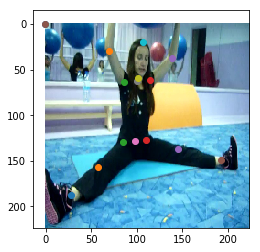

In [22]:
n=190
img = df['NAME'][n]
im = load_img('../MPII/'+img,target_size=(224,224))
points = y_train2[n]
i=0
plt.imshow(im)
while i < 16:
    x = points[2*i]
    y = points[(2*i)+1]
    plt.scatter([[x]],[[y]])
    i=i+1


In [23]:
#imag(10)
X=image_data2/255.

In [24]:
from keras.applications.resnet50 import ResNet50

In [25]:
base_model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
for layer in base_model.layers[:-7]:
    layer.trainable=False

for layer in base_model.layers:
    print(layer,layer.trainable)
print(base_model.summary())

/usr/local/lib/python2.7/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


(<keras.engine.input_layer.InputLayer object at 0x7f098d2f1990>, False)
(<keras.layers.convolutional.ZeroPadding2D object at 0x7f098d2f1d10>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f098d2f1e10>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7f0a0c322450>, False)
(<keras.layers.core.Activation object at 0x7f098d2f1f10>, False)
(<keras.layers.convolutional.ZeroPadding2D object at 0x7f098dae7810>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7f098daf2090>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f098daf2750>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7f08b456c310>, False)
(<keras.layers.core.Activation object at 0x7f08b456c990>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f08b4509990>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7f08b4538dd0>, False)
(<keras.layers.core.Activation object at 0x7f08b45383d0>, False)
(<keras.layers.convolutional.Conv2D object at 0x7f08b

input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
pool1_pad 

In [26]:
model=Sequential()

model.add(base_model)
model.add(Flatten())
# model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 36,437,024
Trainable params: 16,264,864
Non-trainable params: 20,172,160
_________________________________________________________________


In [65]:
# model.add(Convolution2D(32,(4,4),activation='relu',input_shape=(224,224,3)))

# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
# model.add(Convolution2D(64,(5,5),activation='relu'))
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
# model.add(Convolution2D(128,(5,5),activation='relu'))
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))


In [27]:
checkpoint=ModelCheckpoint('./base.model',
                          monitor='val_loss',
                          verbose=1,
                          save_best_only=True,
                          mode='max',
                          save_weights_only=False,
                          period=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=30,
                       verbose=1,
                       mode='auto')

tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

lrsched = LearningRateScheduler(step_decay,verbose=1)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    verbose=1, 
    mode='auto',
    min_delta=0.0001, 
    cooldown=1, 
    min_lr=0.0001
)

callbacks = [checkpoint,tensorboard,earlystop,csvlogger,reduce]

In [28]:
opt=SGD(lr=1e-5,momentum=0.95)

model.compile(loss='mean_absolute_error',
             optimizer=opt,metrics=['mean_absolute_error'])

In [29]:
hist=model.fit(X,y_train2,epochs=10,shuffle=True,batch_size=2,validation_split=0.2,callbacks=callbacks)

Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 1029s 429ms/step - loss: 60.0508 - mean_absolute_error: 60.0508 - val_loss: 80.2321 - val_mean_absolute_error: 80.2321

Epoch 00001: val_loss improved from -inf to 80.23214, saving model to ./base.model
Epoch 2/10
2400/2400 [==============================] - 751s 313ms/step - loss: 41.5027 - mean_absolute_error: 41.5027 - val_loss: 76.7029 - val_mean_absolute_error: 76.7029

Epoch 00002: val_loss did not improve from 80.23214
Epoch 3/10
2400/2400 [==============================] - 749s 312ms/step - loss: 38.8219 - mean_absolute_error: 38.8219 - val_loss: 72.7878 - val_mean_absolute_error: 72.7878

Epoch 00003: val_loss did not improve from 80.23214
Epoch 4/10
2400/2400 [==============================] - 746s 311ms/step - loss: 36.6633 - mean_absolute_error: 36.6633 - val_loss: 69.4905 - val_mean_absolute_error: 69.4905

Epoch 00004: val_loss did not improve from 80.23214
Epoch 5/10
24

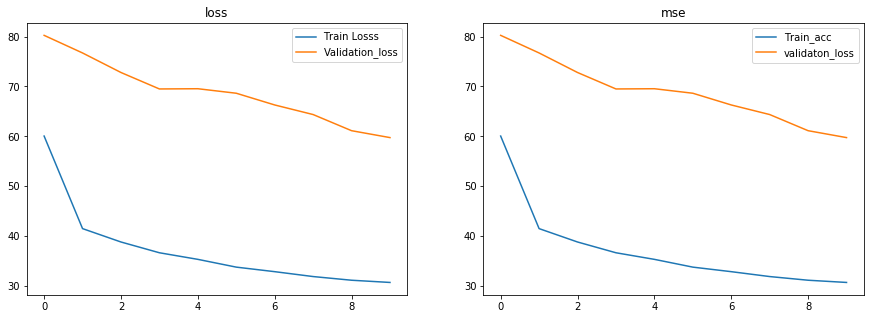

In [30]:
show_final_history(hist)                                                                                                       

In [62]:
# history=model.fit(X,y_train2,steps_per_epoch=50,
#                            validation_split=0.2,
#                            validation_steps=50,
#                            epochs=7,verbose=1,
#                            callbacks=callbacks)

Train on 160 samples, validate on 40 samples
Epoch 1/7
50/50 [==============================] - 434s 9s/step - loss: 0.8673 - mean_absolute_error: 0.8673 - val_loss: 0.5165 - val_mean_absolute_error: 0.5165

Epoch 00001: val_loss improved from -inf to 0.51650, saving model to ./base.model
Epoch 2/7
50/50 [==============================] - 402s 8s/step - loss: 0.7924 - mean_absolute_error: 0.7924 - val_loss: 0.5057 - val_mean_absolute_error: 0.5057

Epoch 00002: val_loss did not improve from 0.51650
Epoch 3/7
50/50 [==============================] - 434s 9s/step - loss: 0.7487 - mean_absolute_error: 0.7487 - val_loss: 0.4999 - val_mean_absolute_error: 0.4999

Epoch 00003: val_loss did not improve from 0.51650
Epoch 4/7
50/50 [==============================] - 447s 9s/step - loss: 0.7097 - mean_absolute_error: 0.7097 - val_loss: 0.4963 - val_mean_absolute_error: 0.4963

Epoch 00004: val_loss did not improve from 0.51650
Epoch 5/7
50/50 [==============================] - 415s 8s/step - lo

In [32]:
# show_final_history(history) 

In [33]:
y_pred=model.predict(X[:10])


In [34]:
print(y_pred[0])
print(y_train2[0])

[35.334724 55.211853 44.41015  64.5031   48.45878  61.221268 55.203465
 59.632683 47.282177 63.572468 37.29875  57.117092 51.52275  58.85042
 51.453064 38.433243 50.470814 34.64647  52.04537  24.30547  48.602093
 52.991425 47.27602  50.189228 47.66206  37.80191  52.94969  37.954796
 54.97702  49.889072 53.72239  52.3285  ]
[108.5      122.577774 107.8       83.68889  100.275     57.555557
 113.225     58.488888 115.675     68.755554 114.8       71.86667
 106.75      58.177776 113.225     54.755554 111.478516  59.05458
 121.796486  33.65653  106.05      67.51111   96.775     50.08889
 105.175     51.955555 121.1       57.555557 121.275     74.666664
 120.4       97.37778 ]


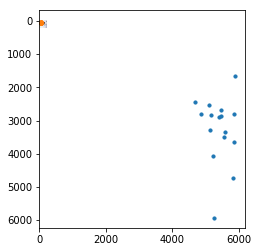

In [41]:
plt.imshow(X[0])
plt.scatter(y_train2[0][0::2]*48+48,y_train2[0][1::2]*48+48,s=10)
plt.scatter(y_pred[0][0::2],y_pred[0][1::2],s=10)

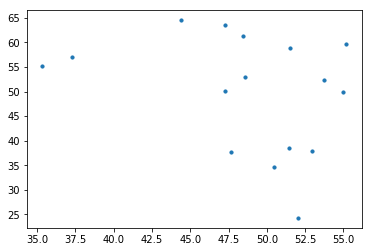

In [40]:
plt.scatter(y_pred[0][0::2],y_pred[0][1::2],s=10)

In [26]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils

import tensorflow

In [27]:
model1 = Sequential()
model1.add(Convolution2D(32,(3,3),activation='relu', input_shape=(48,48,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.1))
model1.add(Convolution2D(64, (2,2), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.25))
model1.add(Convolution2D(128,(2,2),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(500,activation='softmax'))
model1.add(Dense(500,activation='softmax'))
model1.add(Dense(32,activation='linear'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       32896     
__________

In [28]:
model1.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

hist1=model1.fit(X,y_train2,epochs=50,shuffle=True,batch_size=256,validation_split=0.2,callbacks=callbacks)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 27s 3ms/step - loss: 0.5161 - mean_absolute_error: 0.5161 - val_loss: 0.4733 - val_mean_absolute_error: 0.4733

Epoch 00001: val_loss improved from -inf to 0.47330, saving model to ./base.model
Epoch 2/50
8000/8000 [==============================] - 26s 3ms/step - loss: 0.4538 - mean_absolute_error: 0.4538 - val_loss: 0.4130 - val_mean_absolute_error: 0.4130

Epoch 00002: val_loss did not improve from 0.47330
Epoch 3/50
8000/8000 [==============================] - 29s 4ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - val_loss: 0.3571 - val_mean_absolute_error: 0.3571

Epoch 00003: val_loss did not improve from 0.47330
Epoch 4/50
8000/8000 [==============================] - 28s 3ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - val_loss: 0.3076 - val_mean_absolute_error: 0.3076

Epoch 00004: val_loss did not improve from 0.47330
Epoch 5/50
8000/8000 [=======================

8000/8000 [==============================] - 26s 3ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709

Epoch 00037: val_loss did not improve from 0.47330

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815.
Epoch 38/50
8000/8000 [==============================] - 27s 3ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1710 - val_mean_absolute_error: 0.1710

Epoch 00038: val_loss did not improve from 0.47330
Epoch 39/50
8000/8000 [==============================] - 26s 3ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709

Epoch 00039: val_loss did not improve from 0.47330
Epoch 40/50
8000/8000 [==============================] - 26s 3ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709

Epoch 00040: val_loss did not improve from 0.47330
Epoch 41/50
8000/8000 [===========================

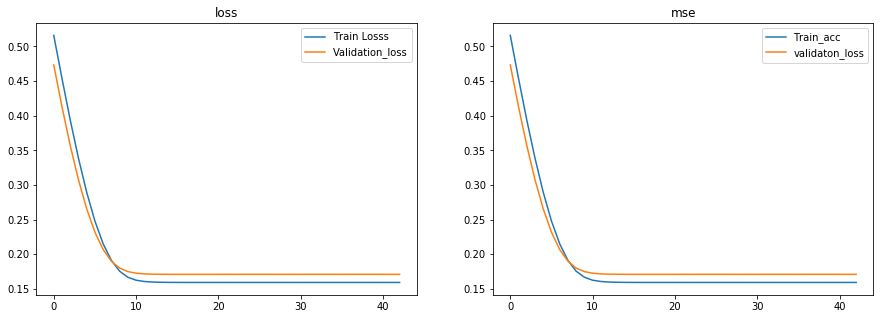

In [30]:
show_final_history(hist1)

In [33]:
y_pred=model1.predict(X[:10])

In [37]:
y_train2[0]

array([-0.515625  , -0.45277777, -0.51875   , -0.6263889 , -0.5523437 ,
       -0.7430556 , -0.49453124, -0.73888886, -0.48359376, -0.69305557,
       -0.4875    , -0.6791667 , -0.5234375 , -0.74027777, -0.49453124,
       -0.75555557, -0.50232804, -0.7363635 , -0.45626572, -0.84974766,
       -0.5265625 , -0.69861114, -0.5679687 , -0.7763889 , -0.53046876,
       -0.76805556, -0.459375  , -0.7430556 , -0.45859376, -0.6666667 ,
       -0.4625    , -0.56527776], dtype=float32)

In [36]:
y_pred[0]

array([-0.659154  , -0.34682885, -0.5911691 , -0.37221885, -0.5459085 ,
       -0.42939147, -0.50081   , -0.42848346, -0.546587  , -0.37196857,
       -0.6363921 , -0.34510857, -0.5234307 , -0.42990324, -0.51753926,
       -0.64261043, -0.5176599 , -0.6742822 , -0.5188664 , -0.8125866 ,
       -0.5570531 , -0.48716623, -0.5690938 , -0.52651143, -0.55707955,
       -0.6427675 , -0.4864606 , -0.6445044 , -0.47527105, -0.52508914,
       -0.4851787 , -0.4846713 ], dtype=float32)

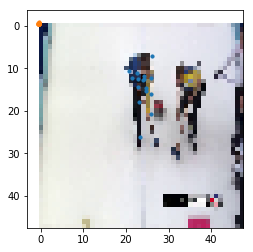

In [38]:
plt.imshow(X[0])
plt.scatter(y_train2[0][0::2]*48+48,y_train2[0][1::2]*48+48,s=10)
plt.scatter(y_pred[0][0::2],y_pred[0][1::2],s=10)